# Heatmap 可视化

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 一维高斯分布以及二维高斯分布

### 高斯分布 $x \sim N(\mu, \sigma)$

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

### 二维高斯分布 
x, y 相互独立
$$
f(x, y) = \frac{1}{\sqrt{2\pi}\sigma_1\sigma_2}(\exp{\frac{-(x-\mu_1)^2}{2\sigma_1^2}} + \exp{\frac{-(y-\mu_2)^2}{2\sigma_2^2}})
$$


In [2]:
def gaus1d(x, mu, sigma):
    return np.exp(-(x - mu)**2.0/(2.0*sigma**2.0))/(np.sqrt(2*np.pi)*sigma)

def gaus2d(x, x_mu, y, y_mu, sigma):
    return np.exp(-((x - x_mu)**2.0/(2.0*sigma**2.0) + (y - y_mu)**2.0/(2.0*sigma**2.0)))


In [3]:
def gen_heatlines(coordinates, W = 256, H = 256):
    '''
    coordinates: a set of coordinates, np.ndarray, shape [N, 2]
    W: weight of heatline
    H: height of heatline
    '''
    x, y = coordinates[0],coordinates[1]
    x_line = np.linspace(0, W - 1, W)
    y_line = np.linspace(0, H - 1, H)
    sigma = 2
    x_heatline = gaus1d(x_line, x, sigma)
    y_heatline = gaus1d(y_line, y, sigma)
    x_fig_name = f'{x}_{y}_x_heatline.png'
    y_fig_name = f'{x}_{y}_y_heatline.png' 
    x_heatline = np.repeat(np.reshape(x_heatline, (1,W)),W, axis= 0)
    y_heatline = np.repeat(np.reshape(y_heatline, (1,H)),H, axis= 0)
    print(x_heatline.shape, y_heatline.shape)
    ax = sns.heatmap(data=x_heatline,cmap="RdBu_r",cbar=False,xticklabels =False,yticklabels=False, robust=True) 
    hist_fig = ax.get_figure()
    # hist_fig.savefig(x_fig_name ,dpi=1000 ,bbox_inches = 'tight')
    ax = sns.heatmap(data=y_heatline,cmap="RdBu_r",cbar=False,xticklabels =False,yticklabels=False ) 
    hist_fig = ax.get_figure()
    # hist_fig.savefig(y_fig_name, dpi=1000,bbox_inches = 'tight')
    plt.show()

(32, 32) (32, 32)


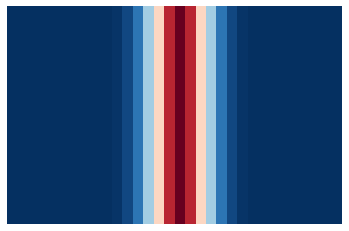

In [4]:
coordinates = [8, 16]
gen_heatlines(coordinates,W = 32, H = 32)

In [5]:
def gen_heatmap(coordinates, W = 256, H = 256):
    '''
    coordinates: a set of coordinates, np.ndarray, shape [N, 2]
    W: weight of heatline
    H: height of heatline
    '''
    mu_x, mu_y = coordinates[0],coordinates[1]
    sigma = 3
    x = np.arange(0, W, 1, np.float32)
    y = np.arange(0, H, 1, np.float32)
    y = y[:, None]
    target = np.exp(-((x - mu_x)**2 +(y - mu_y)**2) / (2 * sigma**2))/(np.sqrt(2*np.pi)*sigma*sigma)
    xy_fig_name = 'xy_heatmap.png'
    ax = sns.heatmap(data=target,cmap="RdBu_r", cbar=False,xticklabels =False,yticklabels=False, robust=True) 
    hist_fig = ax.get_figure()
    # hist_fig.savefig(xy_fig_name ,dpi=1000,bbox_inches = 'tight')
    plt.show()

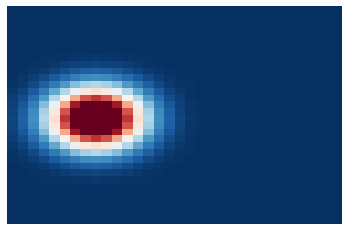

In [6]:
coordinates = [8, 16]
    # gen_heatlines(coordinates,W = 32, H = 32)
gen_heatmap(coordinates, W = 32, H = 32)